# Blob-level Analysis

In [2]:
x=list()
classes=c("integer","character","numeric","integer","integer")
for(i in 0:2){
    path=paste("../data/blobs/bsample.sltcd.",i,"y",sep="")
    x[[i+1]]=read.table(path,sep=";",colClasses=classes,na.strings=c("null"))
}
names(x)=c("All","1y","2y")

In [3]:
for(i in 1:3){
    names(x[[i]])=c("s","l","t","c","d")
    x[[i]]$c=as.logical(x[[i]]$c)
    x[[i]]$b=is.na(x[[i]]$s)
}    

In [4]:
tmp=list()
for(i in 1:3) {
    tmp[[i]]=names(table(x[[i]]$l)[table(x[[i]]$l)>100000])
}
tmp2=intersect(intersect(tmp[[1]],tmp[[2]]),tmp[[3]])
for(i in 1:3) {
    x[[i]]$ll=as.factor(ifelse(((x[[i]]$l %in% tmp2) & (x[[i]]$l != "null") & (x[[i]]$l != "Unknown")),
                     as.character(x[[i]]$l), "0ther"))
}
ty=names(table(x[[i]]$ll))

## Variables

- s: Size 
- l: Language
- t: Time 
- c: Is copied
- d: Downstream projects
- b: Is binary

In [26]:
for(i in 1:3) {
    print(names(x)[i])
    print(summary(x[[i]]))
}

[1] "All"
       s                  l                   t                 c            
 Min.   :        2   Length:122668368   Min.   :0.000e+00   Mode :logical    
 1st Qu.:      553   Class :character   1st Qu.:1.489e+09   FALSE:114191192  
 Median :     1358   Mode  :character   Median :1.553e+09   TRUE :8477176    
 Mean   :    16637                      Mean   :1.531e+09                    
 3rd Qu.:     4144                      3rd Qu.:1.597e+09                    
 Max.   :613836533                      Max.   :8.951e+09                    
 NA's   :27398022                                                            
       d                b                   ll          
 Min.   :     0.0   Mode :logical    Other   :76340563  
 1st Qu.:     0.0   FALSE:95270346   JS      :18162569  
 Median :     0.0   TRUE :27398022   java    : 5727418  
 Mean   :     1.5                    C       : 4126564  
 3rd Qu.:     0.0                    Markdown: 3887356  
 Max.   :863568.0       

### 1. What fraction of blobs are copied?

In [27]:
for(i in 1:3) {
    print(c(names(x)[i],sum(x[[i]]$c)/dim(x[[i]])[1]))
    print(c("Binaries excluded:",sum(x[[i]][!x[[i]]$b,"c"])/dim(x[[i]][!x[[i]]$b,])[1]))
}

[1] "All"                "0.0691064545669997"
[1] "Binaries excluded:" "0.0633983002433937"
[1] "1y"                 "0.0614612341053134"
[1] "Binaries excluded:" "0.0568222332892975"
[1] "2y"                 "0.0758498980189842"
[1] "Binaries excluded:" "0.0703809751872513"


### 2. Does the propensity to copy vary with language?

In [28]:
for(i in 2:3){
    print(names(x)[i])
    test=aov(c ~ ll, data=x[[i]])
    print(summary(test));
}

[1] "1y"
                   Df  Sum Sq Mean Sq F value Pr(>F)    
ll                 21   32024  1524.9   26569 <2e-16 ***
Residuals   111460968 6397464     0.1                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
[1] "2y"
                  Df  Sum Sq Mean Sq F value Pr(>F)    
ll                21   33032  1572.9   22565 <2e-16 ***
Residuals   84636809 5899730     0.1                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


#### 2.1. Which languages are different?

In [29]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){ 
        test=t.test(x[[i]][x[[i]]$ll==l,"c"],x[[i]][x[[i]]$ll!=l,"c"])
        if(test$p.value<sv){
            mean=sum(x[[i]][x[[i]]$ll==l,"c"])/dim(x[[i]][x[[i]]$ll==l,])[1]
            print(c(l,mean,sprintf("t: %f",test$statistic)))
        }else{
            print(c(l,"Not significant!"))
        }
    }
}

[1] "1y"
[1] "C"                "0.13247575671542" "t: 427.762915"   
[1] "CSS"                "0.0600209492330253" "t: -6.313934"      
[1] "Cs"                 "0.0535597530852168" "t: -50.682979"     
[1] "Fml"                "0.0665055831847612" "t: 8.366666"       
[1] "Go"                 "0.0676721571740425" "t: 16.688648"      
[1] "JS"                 "0.0454613563374903" "t: -323.544157"    
[1] "Kotlin"            "0.025943061789138" "t: -122.991248"   
[1] "Markdown"           "0.0319865798047435" "t: -316.557567"    
[1] "ObjectiveC"         "0.0727411039821064" "t: 24.990494"      
[1] "Other"              "0.0623895418770649" "t: 52.436575"      
[1] "PY"                 "0.0544774489144131" "t: -48.208890"     
[1] "R"                  "0.0855873728624931" "t: 39.251335"      
[1] "Rust"               "0.0556607054750754" "t: -12.593480"     
[1] "Scala"              "0.0306845674939291" "t: -84.235546"     
[1] "Sql"                "0.0573553387472549" "t: -7.792719"  

In [196]:
for(i in 2:3) {
    print(names(x)[i])
    glm=glm(c~ll, data=x[[i]], family=binomial)
    print(summary(glm))
}

[1] "1y"

Call:
glm(formula = c ~ ll, family = binomial, data = x[[i]])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6124  -0.3589  -0.3589  -0.3318   2.7025  

Coefficients:
               Estimate Std. Error   z value Pr(>|z|)    
(Intercept)  -2.7099369  0.0004971 -5451.621  < 2e-16 ***
llC           0.8306931  0.0015655   530.620  < 2e-16 ***
llCSS        -0.0412270  0.0040927   -10.073  < 2e-16 ***
llCs         -0.1619730  0.0031398   -51.587  < 2e-16 ***
llFml         0.0682878  0.0097321     7.017 2.27e-12 ***
llGo          0.0869272  0.0059326    14.652  < 2e-16 ***
llJS         -0.3344286  0.0012979  -257.663  < 2e-16 ***
llKotlin     -0.9156286  0.0114343   -80.077  < 2e-16 ***
llMarkdown   -0.6999926  0.0030544  -229.171  < 2e-16 ***
llObjectiveC  0.1646107  0.0067216    24.490  < 2e-16 ***
llPY         -0.1440140  0.0028827   -49.958  < 2e-16 ***
llR           0.3411927  0.0078787    43.306  < 2e-16 ***
llRust       -0.1212742  0.0087857   -13.804 

### 3. Are binary blobs more likely to be copied?

In [32]:
for(i in 2:3) {
    print(names(x)[i])
    test=t.test(x[[i]][x[[i]]$b,"c"],x[[i]][!x[[i]]$b,"c"])
    print(test)
}

[1] "1y"

	Welch Two Sample t-test

data:  x[[i]][x[[i]]$b, "c"] and x[[i]][!x[[i]]$b, "c"]
t = 351.37, df = 36289558, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02065332 0.02088503
sample estimates:
 mean of x  mean of y 
0.07759141 0.05682223 

[1] "2y"

	Welch Two Sample t-test

data:  x[[i]][x[[i]]$b, "c"] and x[[i]][!x[[i]]$b, "c"]
t = 332.06, df = 26998008, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02477441 0.02506860
sample estimates:
 mean of x  mean of y 
0.09530248 0.07038098 



### 4. Are copied blobs smaller?

In [68]:
for(i in 2:3) {
    print(names(x)[i])
    test=t.test(log(x[[i]][x[[i]]$c,"s"]),log(x[[i]][!x[[i]]$c,"s"]))
    print(test)
}

[1] "1y"

	Welch Two Sample t-test

data:  log(x[[i]][x[[i]]$c, "s"]) and log(x[[i]][!x[[i]]$c, "s"])
t = -222.22, df = 5528798, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1731598 -0.1701320
sample estimates:
mean of x mean of y 
 7.167717  7.339363 

[1] "2y"

	Welch Two Sample t-test

data:  log(x[[i]][x[[i]]$c, "s"]) and log(x[[i]][!x[[i]]$c, "s"])
t = -199.3, df = 5348321, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1608797 -0.1577463
sample estimates:
mean of x mean of y 
 7.142075  7.301388 



#### 4.1. Is this the case for all languages?

In [72]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){ 
        test=t.test(log(x[[i]][x[[i]]$ll==l&x[[i]]$c,"s"]),log(x[[i]][x[[i]]$ll==l&!x[[i]]$c,"s"]))
        if(test$p.value<sv){
            print(c(l,sprintf("t: %f",test$statistic)))
        }else{
            print(c(l,"Not significant!"))
        }
    }
}

[1] "1y"
[1] "C"             "t: 216.836513"
[1] "CSS"          "t: -3.504343"
[1] "Cs"               "Not significant!"
[1] "Fml"              "Not significant!"
[1] "Go"           "t: 24.338372"
[1] "JS"            "t: -62.877606"
[1] "Kotlin"        "t: -14.695897"
[1] "Markdown"      "t: -59.064043"
[1] "ObjectiveC"  "t: 7.621318"
[1] "Other"          "t: -411.342656"
[1] "PY"           "t: 21.424793"
[1] "R"            "t: -7.713302"
[1] "Rust"         "t: -7.192477"
[1] "Scala"        "t: 14.646112"
[1] "Sql"           "t: -12.622829"
[1] "Swift"        "t: -5.014679"
[1] "TypeScript"    "t: -38.828616"
[1] "ipy"          "t: -8.096101"
[1] "java"          "t: 138.465030"
[1] "php"          "t: 39.226481"
[1] "pl"          "t: 9.605817"
[1] "rb"            "t: -11.782498"
[1] "2y"
[1] "C"             "t: 195.919272"
[1] "CSS"           "t: -11.883050"
[1] "Cs"           "t: 12.552948"
[1] "Fml"              "Not significant!"
[1] "Go"           "t: 15.571693"
[1] "JS"            

In [4]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){ 
        test=t.test(log(x[[i]][x[[i]]$ll==l&x[[i]]$c,"s"]),log(x[[i]][x[[i]]$ll==l&!x[[i]]$c,"s"]))
        print(c(l,sprintf("t: %f %f",test$statistic,test$p.value)))
    }
}

[1] "1y"
[1] "0ther"                   "t: -411.342656 0.000000"
[1] "C"                      "t: 216.836513 0.000000"
[1] "CSS"                   "t: -3.504343 0.000458"
[1] "Cs"                   "t: 2.043808 0.040975"
[1] "Fml"                   "t: -1.338891 0.180630"
[1] "Go"                    "t: 24.338372 0.000000"
[1] "JS"                     "t: -62.877606 0.000000"
[1] "Kotlin"                 "t: -14.695897 0.000000"
[1] "Markdown"               "t: -59.064043 0.000000"
[1] "ObjectiveC"           "t: 7.621318 0.000000"
[1] "PY"                    "t: 21.424793 0.000000"
[1] "R"                     "t: -7.713302 0.000000"
[1] "Rust"                  "t: -7.192477 0.000000"
[1] "Scala"                 "t: 14.646112 0.000000"
[1] "Sql"                    "t: -12.622829 0.000000"
[1] "Swift"                 "t: -5.014679 0.000001"
[1] "TypeScript"             "t: -38.828616 0.000000"
[1] "ipy"                   "t: -8.096101 0.000000"
[1] "java"                   "t: 138.465030

### 5. How does copied blob size vary by language?

In [4]:
sv=0.005
for(i in 3:3){
    print(names(x)[i])
    for(l in ty){ 
        test1=t.test(log(x[[i]][x[[i]]$ll==l&x[[i]]$c,"s"]),log(x[[i]][x[[i]]$ll!=l&x[[i]]$c,"s"]))
        test2=t.test(log(x[[i]][x[[i]]$ll==l,"s"]),log(x[[i]][x[[i]]$ll!=l,"s"]))
        print(c(l,"Copied",sprintf("t: %f %f",test1$statistic,test1$p.value)))
        print(c(l,"All",sprintf("t: %f %f",test2$statistic,test2$p.value)))
    }
}

[1] "2y"
[1] "0ther"                   "Copied"                 
[3] "t: -169.191826 0.000000"
[1] "0ther"                  "All"                    "t: 757.854873 0.000000"
[1] "C"                      "Copied"                 "t: 437.152911 0.000000"
[1] "C"                      "All"                    "t: 416.195485 0.000000"
[1] "CSS"                   "Copied"                "t: 24.273218 0.000000"
[1] "CSS"                   "All"                   "t: 62.589498 0.000000"
[1] "Cs"                     "Copied"                 "t: -47.621574 0.000000"
[1] "Cs"                      "All"                    
[3] "t: -429.449202 0.000000"
[1] "Fml"                   "Copied"                "t: 31.228449 0.000000"
[1] "Fml"                   "All"                   "t: 75.348967 0.000000"
[1] "Go"                    "Copied"                "t: 37.711196 0.000000"
[1] "Go"                    "All"                   "t: 11.913508 0.000000"
[1] "JS"                     "Copied"          

In [5]:
for(i in 3:3){
    print(names(x)[i])
    lm=lm(log(s)~ll, data=x[[i]])
    print(summary(lm))
}

[1] "2y"

Call:
lm(formula = log(s) ~ ll, data = x[[i]])

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5685 -0.9666 -0.0405  0.9237 12.7971 

Coefficients:
               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)   7.4381048  0.0002776 26792.86   <2e-16 ***
llC           0.1734752  0.0009097   190.70   <2e-16 ***
llCSS        -0.0316386  0.0017963   -17.61   <2e-16 ***
llCs         -0.5173998  0.0012801  -404.17   <2e-16 ***
llFml         0.1311505  0.0042791    30.65   <2e-16 ***
llGo         -0.1234639  0.0028121   -43.91   <2e-16 ***
llJS         -0.3160199  0.0005573  -567.03   <2e-16 ***
llKotlin     -0.7651269  0.0036753  -208.18   <2e-16 ***
llMarkdown   -0.6215325  0.0010417  -596.67   <2e-16 ***
llObjectiveC -0.0967369  0.0029266   -33.05   <2e-16 ***
llPY         -0.0888544  0.0012094   -73.47   <2e-16 ***
llR          -0.2834085  0.0039459   -71.82   <2e-16 ***
llRust       -0.0593452  0.0038020   -15.61   <2e-16 ***
llScala      -0.3867460  0.0038062  

In [197]:
for(i in 2:3){
    print(names(x)[i])
    lm=lm(log(s)~ll, data=x[[i]][x[[i]]$c,])
    print(summary(lm))
}

[1] "1y"

Call:
lm(formula = log(s) ~ ll, data = x[[i]][x[[i]]$c, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5976 -0.9978 -0.0750  0.8504 11.6753 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)   7.053235   0.001053 6697.838  < 2e-16 ***
llC           0.930680   0.002483  374.848  < 2e-16 ***
llCSS         0.232384   0.006491   35.802  < 2e-16 ***
llCs         -0.143853   0.005016  -28.677  < 2e-16 ***
llFml         0.511076   0.015307   33.389  < 2e-16 ***
llGo          0.418453   0.009342   44.793  < 2e-16 ***
llJS         -0.010767   0.002177   -4.947 7.54e-07 ***
llKotlin     -0.580974   0.018364  -31.636  < 2e-16 ***
llMarkdown   -0.565806   0.004935 -114.642  < 2e-16 ***
llObjectiveC  0.341732   0.010549   32.394  < 2e-16 ***
llPY          0.338500   0.004612   73.399  < 2e-16 ***
llR           0.042956   0.012272    3.500 0.000465 ***
llRust        0.254929   0.013901   18.339  < 2e-16 ***
llScala       0.179286   0.019696    9

In [7]:
for(i in 3:3){
    print(names(x)[i])
    glm=glm(c~ll*log(s), data=x[[i]][x[[i]]$c,], family=binomial)
    print(summary(glm))
}

[1] "2y"


Warning message:
"glm.fit: algorithm did not converge"



Call:
glm(formula = c ~ ll * log(s), family = binomial, data = x[[i]][x[[i]]$c, 
    ])

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
2.409e-06  2.409e-06  2.409e-06  2.409e-06  2.409e-06  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)
(Intercept)          2.657e+01  9.468e+02   0.028    0.978
llC                 -1.214e-07  2.952e+03   0.000    1.000
llCSS               -1.214e-07  6.289e+03   0.000    1.000
llCs                -1.214e-07  6.902e+03   0.000    1.000
llFml               -1.214e-07  1.762e+04   0.000    1.000
llGo                -1.214e-07  1.351e+04   0.000    1.000
llJS                -1.214e-07  2.360e+03   0.000    1.000
llKotlin            -1.214e-07  2.716e+04   0.000    1.000
llMarkdown          -1.214e-07  3.529e+03   0.000    1.000
llObjectiveC        -1.214e-07  1.268e+04   0.000    1.000
llPY                -1.214e-07  5.313e+03   0.000    1.000
llR                 -1.214e-07  1.776e+04   0.000    1

### 6. Are older blobs more likely to be copied?

In [21]:
tx=list()
for(i in 1:3){
    tx[[i]]=x[[i]][x[[i]]$t>0,]
}

In [85]:
for(i in 2:3){
    print(names(x)[i])
    test=t.test(tx[[i]][tx[[i]]$c,"t"],tx[[i]][!tx[[i]]$c,"t"])
    print(test)
}

[1] "1y"

	Welch Two Sample t-test

data:  tx[[i]][tx[[i]]$c, "t"] and tx[[i]][!tx[[i]]$c, "t"]
t = -867.19, df = 7273636, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -42239886 -42049382
sample estimates:
 mean of x  mean of y 
1482549129 1524693763 

[1] "2y"

	Welch Two Sample t-test

data:  tx[[i]][tx[[i]]$c, "t"] and tx[[i]][!tx[[i]]$c, "t"]
t = -767.29, df = 6928871, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -37307358 -37117248
sample estimates:
 mean of x  mean of y 
1461595409 1498807712 



In [86]:
for(i in 2:3) {
    print(names(x)[i])
    glm=glm(c~t, data=tx[[i]], family=binomial)
    print(summary(glm))
}

[1] "1y"

Call:
glm(formula = c ~ t, family = binomial, data = tx[[i]])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4779  -0.3685  -0.3285  -0.3032   2.5281  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.022e+00  5.322e-03     568   <2e-16 ***
t           -3.813e-09  3.555e-12   -1073   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 51476230  on 111380251  degrees of freedom
Residual deviance: 50374157  on 111380250  degrees of freedom
AIC: 50374161

Number of Fisher Scoring iterations: 5

[1] "2y"

Call:
glm(formula = c ~ t, family = binomial, data = tx[[i]])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3917  -0.4087  -0.3694  -0.3453   2.4199  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.801e+00  5.700e-03   491.4   <2e-16 ***
t           -3.572

**Plotting created and copied blobs over time**

In [ ]:
ts=list()
for(i in 2:3){
    ts[[i]]=list()
    for(j in 1:dim(tx[[i]])[1]){
        posix=as.POSIXct(tx[[i]]$t[j], origin="1970-01-01")
        period=substr(posix,1,7)
        c=tx[[i]]$c[j]
        if(is.null(ts[[i]][[period]])){
            ts[[i]][[period]]["total"]=1
            ts[[i]][[period]]["copied"]=c
        }else{
            ts[[i]][[period]]["total"]=ts[[i]][[period]]["total"]+1
            ts[[i]][[period]]["copied"]=ts[[i]][[period]]["copied"]+c
        }
    }
}
saveRDS(ts,"../data/blobs/bsample.ts.rds")

**Monthly**

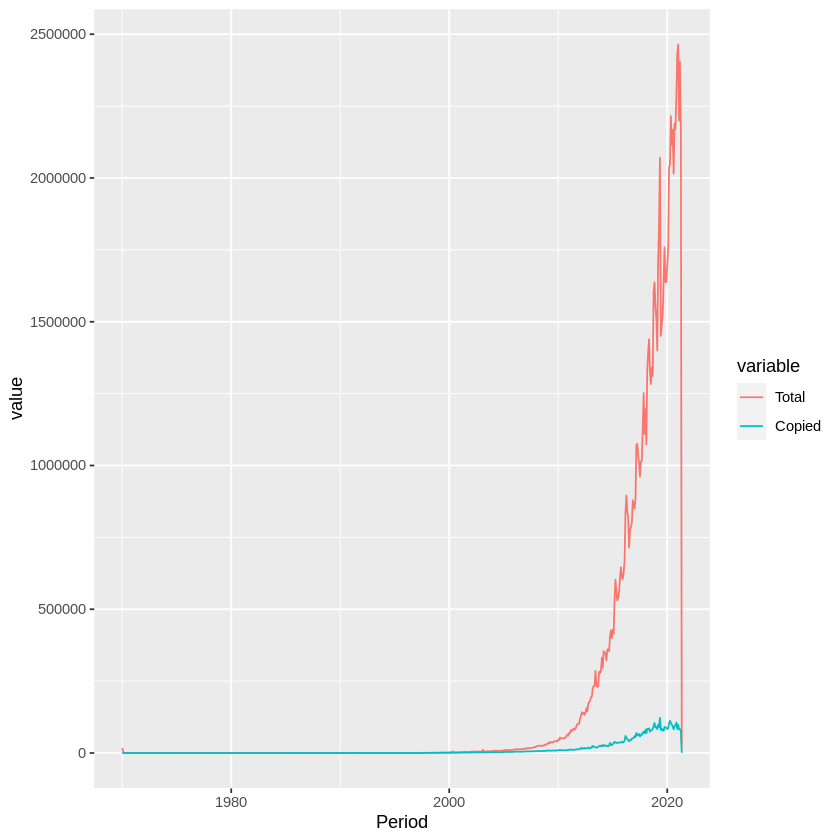

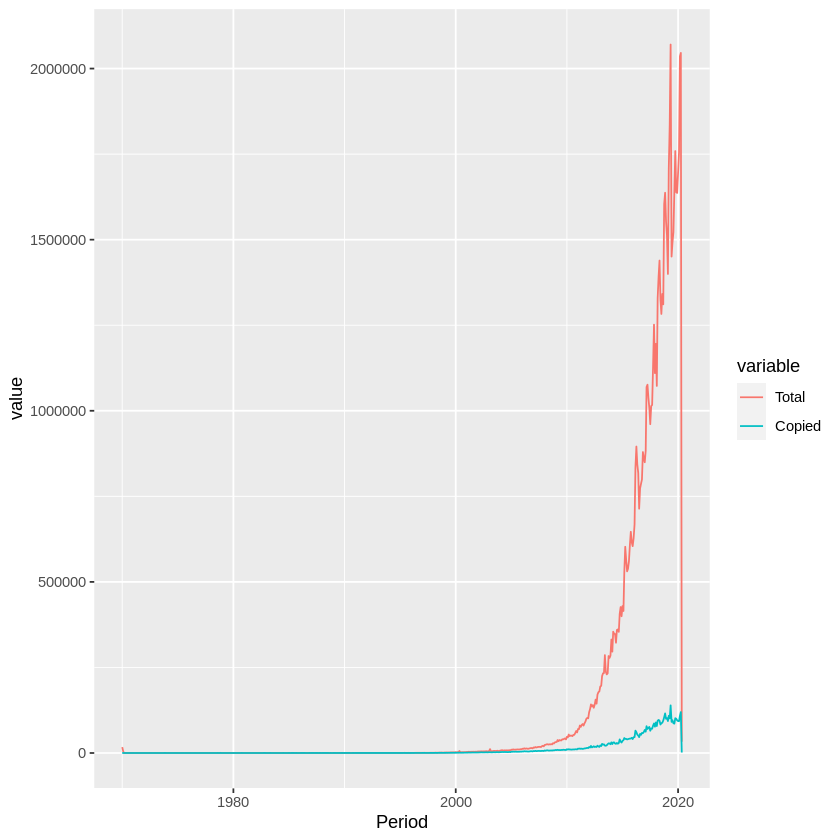

In [120]:
.libPaths(c("~/r-packages/",.libPaths()))
library(ggplot2)
library(reshape)
df=list()
for(i in 2:3){
    df[[i]]=data.frame(matrix(ncol=3, nrow=0))
    colnames(df[[i]])=c("Period","Total","Copied")
    j=1
    for(p in sort(names(ts[[i]]))){
        row=ts[[i]][[p]]
        df[[i]][j,]=c(p,row["total"],row["copied"])
        j=j+1
    }
    df[[i]][,"Period"]=as.Date(paste(df[[i]][,"Period"],"-01",sep=""))
    df[[i]][,"Total"]=as.integer(df[[i]][,"Total"])
    df[[i]][,"Copied"]=as.integer(df[[i]][,"Copied"])
    Molten <- melt(df[[i]], id.vars = "Period")
    print(ggplot(Molten, aes(x = Period, y = value, colour = variable)) + geom_line())
}

**Quarterly**

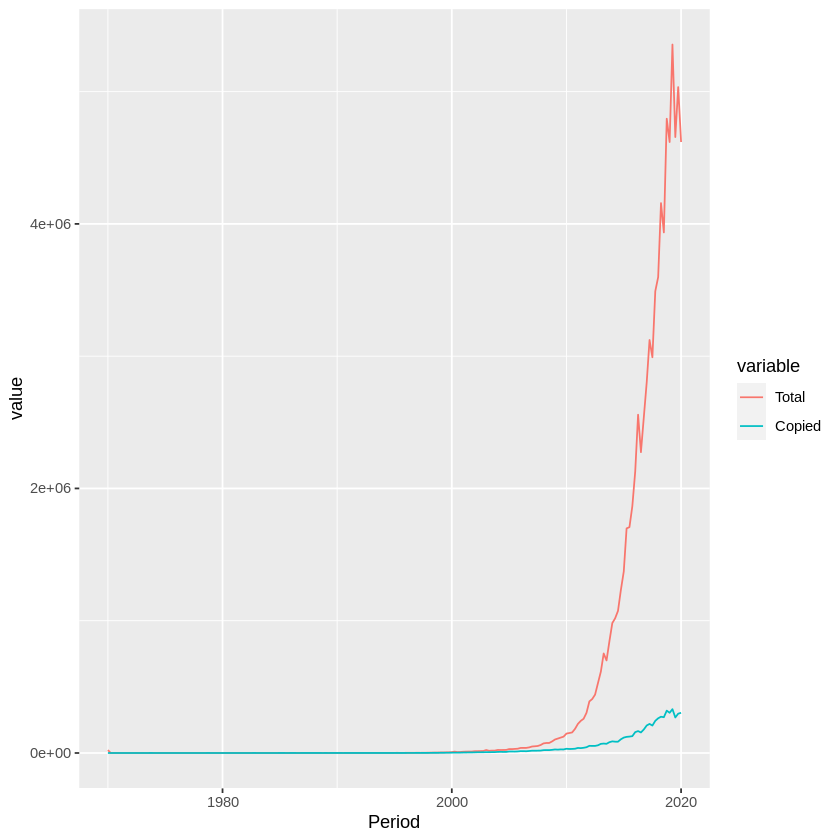

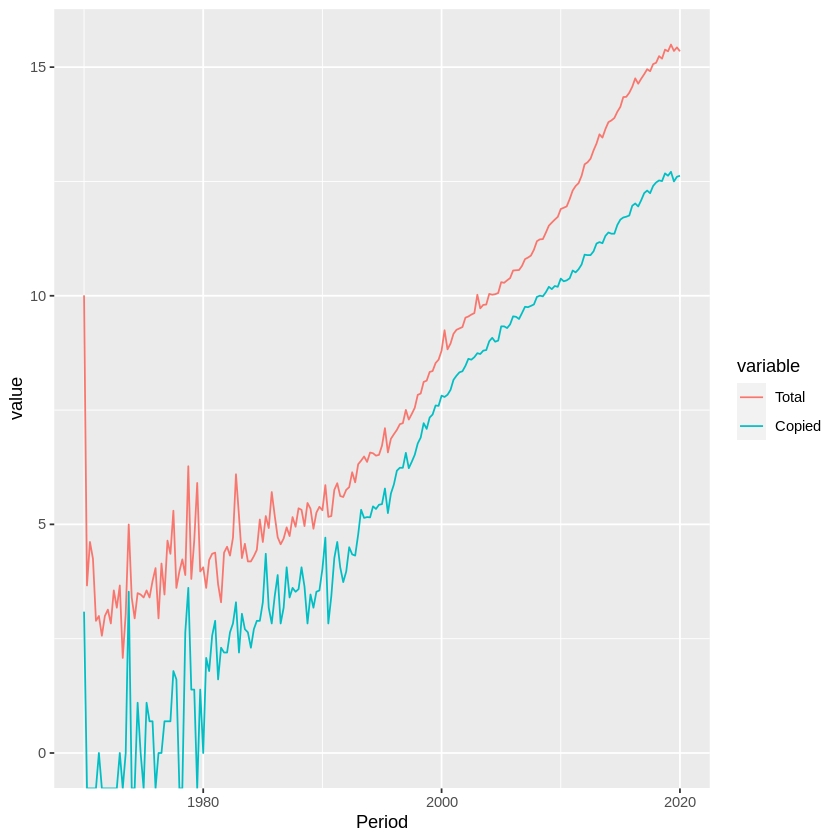

In [194]:
qr=c("01","02","03","04","05","06","07","08","09","10","11","12")
df=data.frame(matrix(ncol=3, nrow=0))
colnames(df)=c("Period","Total","Copied")
j=1
for(y in 1970:2019){
    for(q in 1:4){
        idx=c(3*q-2,3*q-1,3*q)
        df[j,"Period"]=paste(y,"-",qr[idx[1]],"-01",sep="")
        df[j,"Total"]=0
        df[j,"Copied"]=0
        for(m in 1:3){
            p=paste(as.character(y),"-",qr[idx[m]],sep="")
            row=ts[[3]][[p]]
            df[j,"Total"]=df[j,"Total"]+as.integer(row["total"])
            df[j,"Copied"]=df[j,"Copied"]+as.integer(row["copied"])
        }
        j=j+1
    }
}
df[j,"Period"]=paste("2020","-",qr[1],"-01",sep="")
df[j,"Total"]=0
df[j,"Copied"]=0
for(m in 1:3){
    p=paste(as.character(y),"-",qr[m],sep="")
    row=ts[[3]][[p]]
    df[j,"Total"]=df[j,"Total"]+as.integer(row["total"])
    df[j,"Copied"]=df[j,"Copied"]+as.integer(row["copied"])
}
df[,"Period"]=as.Date(df[,"Period"])
Molten <- melt(df, id.vars = "Period")
print(ggplot(Molten, aes(x = Period, y = value, colour = variable)) + geom_line())
df[,"Total"]=log(df[,"Total"])
df[,"Copied"]=log(df[,"Copied"])
Molten <- melt(df, id.vars = "Period")
print(ggplot(Molten, aes(x = Period, y = value, colour = variable)) + geom_line())

#### 6.1. Is this the case for all languages?

In [87]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){ 
        test=t.test(tx[[i]][tx[[i]]$ll==l&tx[[i]]$c,"t"],tx[[i]][tx[[i]]$ll==l&!tx[[i]]$c,"t"])
        if(test$p.value<sv){
            print(c(l,sprintf("t: %f",test$statistic)))
        }else{
            print(c(l,"Not significant!"))
        }
    }
}

[1] "1y"
[1] "C"              "t: -350.828318"
[1] "CSS"           "t: -49.993496"
[1] "Cs"            "t: -75.287781"
[1] "Fml"           "t: -71.811373"
[1] "Go"            "t: -31.347104"
[1] "JS"             "t: -184.760614"
[1] "Kotlin"        "t: -14.939802"
[1] "Markdown"      "t: -72.953384"
[1] "ObjectiveC"    "t: -43.556782"
[1] "Other"          "t: -607.244046"
[1] "PY"             "t: -135.524940"
[1] "R"             "t: -58.519642"
[1] "Rust"          "t: -40.783967"
[1] "Scala"         "t: -39.920934"
[1] "Sql"           "t: -33.450154"
[1] "Swift"        "t: -3.858263"
[1] "TypeScript"    "t: -39.714780"
[1] "ipy"           "t: -12.300861"
[1] "java"           "t: -280.445886"
[1] "php"            "t: -138.726608"
[1] "pl"            "t: -49.261612"
[1] "rb"            "t: -39.958655"
[1] "2y"
[1] "C"              "t: -323.393356"
[1] "CSS"           "t: -44.837579"
[1] "Cs"            "t: -95.728045"
[1] "Fml"           "t: -68.590412"
[1] "Go"            "t: -17.276222

In [110]:
sv=0.005
for(i in 2:3){
    print(names(x)[i])
    for(l in ty){ 
        glm=glm(c~t, data=tx[[i]][tx[[i]]$ll==l,], family=binomial)
        print(l)
        print(summary(glm)$coef)
    }
}

[1] "1y"
[1] "C"
                Estimate   Std. Error   z value Pr(>|z|)
(Intercept)  3.39547e+00 1.292210e-02  262.7645        0
t           -3.69819e-09 9.156803e-12 -403.8736        0
[1] "CSS"
                 Estimate   Std. Error   z value     Pr(>|z|)
(Intercept)  1.384468e+00 7.056798e-02  19.61892 1.065917e-85
t           -2.732934e-09 4.681179e-11 -58.38132 0.000000e+00
[1] "Cs"
                 Estimate   Std. Error    z value Pr(>|z|)
(Intercept)  2.025011e+00 4.738957e-02   42.73116        0
t           -3.263299e-09 3.176937e-11 -102.71840        0
[1] "Fml"
                 Estimate   Std. Error    z value Pr(>|z|)
(Intercept)  6.297005e+00 8.678629e-02   72.55761        0
t           -6.261895e-09 6.231711e-11 -100.48437        0
[1] "Go"
                 Estimate   Std. Error   z value      Pr(>|z|)
(Intercept)  1.688092e+00 1.347764e-01  12.52513  5.440233e-36
t           -2.805339e-09 8.790957e-11 -31.91164 1.840902e-223
[1] "JS"
                 Estimate   Std. Err

In [202]:
for(i in 2:3) {
    print(names(x)[i])
    glm=glm(c~t+ll, data=tx[[i]], family=binomial)
    print(summary(glm))
}

[1] "1y"

Call:
glm(formula = c ~ t + ll, family = binomial, data = tx[[i]])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5241  -0.3699  -0.3285  -0.3033   2.7965  

Coefficients:
               Estimate Std. Error  z value Pr(>|z|)    
(Intercept)   2.551e+00  5.524e-03  461.745  < 2e-16 ***
t            -3.478e-09  3.666e-12 -948.711  < 2e-16 ***
llC           5.356e-01  1.638e-03  327.016  < 2e-16 ***
llCSS        -4.709e-02  4.105e-03  -11.472  < 2e-16 ***
llCs         -2.067e-01  3.151e-03  -65.603  < 2e-16 ***
llFml        -1.530e-01  9.848e-03  -15.535  < 2e-16 ***
llGo          1.664e-01  5.945e-03   27.995  < 2e-16 ***
llJS         -2.459e-01  1.305e-03 -188.397  < 2e-16 ***
llKotlin     -7.326e-01  1.144e-02  -64.042  < 2e-16 ***
llMarkdown   -6.697e-01  3.090e-03 -216.716  < 2e-16 ***
llObjectiveC -5.778e-02  6.762e-03   -8.546  < 2e-16 ***
llPY         -1.843e-01  2.895e-03  -63.668  < 2e-16 ***
llR           2.820e-01  7.944e-03   35.503  < 2e-16 

**Plotting created and copied blobs over time for each language**

In [ ]:
tsl=list()
for(i in 2:3){
    tsl[[i]]=list()
    for(l in ty){
        tsl[[i]][[l]]=list()
        data=tx[[i]][tx[[i]]$ll==l,]
        for(j in 1:dim(data)[1]){
            posix=as.POSIXct(data$t[j], origin="1970-01-01")
            period=substr(posix,1,7)
            c=data$c[j]
            if(is.null(tsl[[i]][[l]][[period]])){
                tsl[[i]][[l]][[period]]["total"]=1
                tsl[[i]][[l]][[period]]["copied"]=c
            }else{
                tsl[[i]][[l]][[period]]["total"]=tsl[[i]][[l]][[period]]["total"]+1
                tsl[[i]][[l]][[period]]["copied"]=tsl[[i]][[l]][[period]]["copied"]+c
            }
        }
    }
}
saveRDS(tsl,"../data/blobs/bsample.tsl.rds")

## Regression Model

In [58]:
data=x[[2]]
data$lns=log(data$s + 1)

In [59]:
data[data$t==0,"t"]=NA

In [17]:
pred=c("t","b","lns")

In [18]:
cor(data[,pred],method="spearman")

,t,b,lns
t,1.00000000,0.05169052,NA
b,0.05169052,1.00000000,NA
lns,NA,NA,1


In [19]:
pca <- prcomp(data[,pred], retx=F, scale=T)
print(pca)

ERROR: Error in svd(x, nu = 0, nv = k): infinite or missing values in 'x'


In [63]:
glm=glm(c~t+b+ll+lns, data=data, family=binomial)
print(summary(glm))


Call:
glm(formula = c ~ t + b + ll + lns, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8560  -0.3548  -0.3060  -0.2733   2.9477  

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error  z value Pr(>|z|)    
(Intercept)   3.563e+00  6.487e-03  549.240   <2e-16 ***
t            -3.915e-09  4.070e-12 -962.066   <2e-16 ***
bTRUE                NA         NA       NA       NA    
llC           7.038e-01  1.706e-03  412.559   <2e-16 ***
llCSS         1.375e-01  4.134e-03   33.267   <2e-16 ***
llCs         -5.598e-02  3.187e-03  -17.564   <2e-16 ***
llFml         1.567e-02  9.902e-03    1.582    0.114    
llGo          3.631e-01  5.968e-03   60.841   <2e-16 ***
llJS         -6.251e-02  1.390e-03  -44.956   <2e-16 ***
llKotlin     -5.683e-01  1.145e-02  -49.616   <2e-16 ***
llMarkdown   -5.249e-01  3.143e-03 -167.039   <2e-16 ***
llObjectiveC  1.020e-01  6.786e-03   15.028   <2e-16 ***
llPY         -

In [65]:
glm=glm(c~t+b+lns, data=data, family=binomial)
print(summary(glm))


Call:
glm(formula = c ~ t + b + lns, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8240  -0.3552  -0.3087  -0.2797   2.8060  

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.124e+00  6.232e-03   661.7   <2e-16 ***
t           -4.331e-09  3.914e-12 -1106.4   <2e-16 ***
bTRUE               NA         NA      NA       NA    
lns         -6.035e-02  2.910e-04  -207.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37762293  on 86540828  degrees of freedom
Residual deviance: 36534695  on 86540826  degrees of freedom
  (24920161 observations deleted due to missingness)
AIC: 36534701

Number of Fisher Scoring iterations: 5



In [64]:
lm=lm(d~t+b+ll+lns, data=data)
print(summary(lm))


Call:
lm(formula = d ~ t + b + ll + lns, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
    -3     -1      0      0  58205 

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.632e+00  7.201e-02  22.660  < 2e-16 ***
t            -8.034e-10  4.596e-11 -17.481  < 2e-16 ***
bTRUE                NA         NA      NA       NA    
llC           2.502e-01  2.058e-02  12.159  < 2e-16 ***
llCSS         1.834e-01  3.785e-02   4.846 1.26e-06 ***
llCs         -5.027e-02  2.772e-02  -1.814  0.06970 .  
llFml        -2.038e-01  9.405e-02  -2.167  0.03022 *  
llGo          4.236e-01  5.785e-02   7.321 2.46e-13 ***
llJS          4.852e-01  1.140e-02  42.563  < 2e-16 ***
llKotlin     -2.058e-01  7.069e-02  -2.912  0.00359 ** 
llMarkdown    5.152e-02  2.145e-02   2.401  0.01634 *  
llObjectiveC  3.339e-02  6.777e-02   0.493  0.62217    
llPY          2.869e-01  2.565e-02  11.187  < 2e-16 ***
llR          -1.781e-